# Visualization of flux distribution

This notebook provides utilities to filter and extract specific biochemical reactions from a given metabolic model (here, iCHO3K) and then analyze and visualize the flux distribution of these reactions based on flux sampling data. The process includes:

A. Defining lists of reactions (e.g., glycolysis, TCA cycle).
B. Filtering the model’s reactions to find exact matches (or reverse matches) for those lists.
C. Loading flux sampling data (from .pkl or .mat files).
D. Summing flux values across matching reactions.
E. Processing these summed fluxes to handle positive and negative directions correctly.
F. Plotting the distributions (KDE plots) of these summed fluxes to compare different conditions (e.g., wild-type vs. modified strains, or different passage numbers).

[1. Preprocessing flux distribution datasets](#preprocessing) <br>


## 1. Preprocessing flux distribution datasets <a id='preprocessing'></a>

### Reaction lists for visualization (i.e., Glycolysis and TCA cycle)

In [1]:
from cobra.io import load_json_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the model
iCHO_path = "iCHO3K.json"
model = load_json_model(iCHO_path)
iCHO3K = model

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-14


In [3]:
# Function to sum flux values based on filtered reaction dictionary
def sum_fluxes(flux_sampling_df, filtered_reaction_dict):
    summed_flux_df = pd.DataFrame(index=flux_sampling_df.index)
    
    for reactant, reactions in filtered_reaction_dict.items():
        total_flux = pd.Series(0, index=flux_sampling_df.index)  # Initialize total flux with zeros for all rows

        for reaction in reactions:
            if reaction in flux_sampling_df.columns:
                total_flux += flux_sampling_df[reaction]
            else:
                print(f"Warning: Reaction {reaction} not found in the flux sampling data.")

        column_name = f"{reactant}"
        summed_flux_df[column_name] = total_flux

    return summed_flux_df

In [5]:
from scipy.io import loadmat
import pandas as pd

# # Load the .mat file
# mat_data_WT = loadmat('../Data/Context_specific_models/sampling_ADSB_tmp/sample_ec_AUG15_reduced_model_CF_WT_P6_Bio143.mat')
# mat_data_ZeLa = loadmat('../Data/Context_specific_models/sampling_ADSB_tmp/sample_ec_AUG15_reduced_model_CF_ZeLa_P6_Bio144.mat')

# Load the .mat file
mat_data_WT = loadmat(r'C:\Users\user\Documents\DC\Manual curation_iCHO\Whole-Cell-Network-Reconstruction-for-CHO-cells_origin\Whole-Cell-Network-Reconstruction-for-CHO-cells\Data\sampling_ADSB\ATP0_sample_New_ec_AUG15_reduced_model_CF_WT_P6_Bio143.mat')
mat_data_ZeLa = loadmat(r'C:\Users\user\Documents\DC\Manual curation_iCHO\Whole-Cell-Network-Reconstruction-for-CHO-cells_origin\Whole-Cell-Network-Reconstruction-for-CHO-cells\Data\sampling_ADSB\ATP0_sample_New_ec_AUG15_reduced_model_CF_ZeLa_P6_Bio144.mat')

In [6]:
# Manual filtering of TCA and glycosylation reactions
filtered_reaction_dict_gly_manual = {'glc_D →': ['EX_glc_e'],
 'glc_D → g6p': ['Adpgk', 'CBPPer', 'HEX1', 'r0354', 'r0355'],
 'g6p(bg6p) → f6p': ['PGI', 'HMR_7749'],
 'f6p → fdp': ['r0191', 'PFK'],
 'fdp → dhap + g3p': ['FBA'], 'g3p → 13dpg': ['GAPD'], '13dpg → 23dpg': ['DPGM'], '23dpg → 3pg': ['DPGase'],
 '3pg → 13dpg': ['PGK'], 
 '13dpg → 3pg': ['ACYP', 'GBPS'], '2pg → 3pg': ['PGM'],
 '2pg → pep': ['ENO'],
 'pep → pyr': ['PYK',
  'r0122',
  'r0153',
  'r0165',
  'r0280',
  'r0413',
  'RE2954C',
  'PGAM1_PhosHydro'],
 'pyr → accoa': ['PDHm'],
 'lac_L → pyr': ['LDH_L', 'r0173', 'L_LACDcm', 'LDH_Lm'],
 'lac_L → ': ['EX_lac_L_e'],
 'g6p → 6pgl': ['G6PDH1rer', 'G6PDH2r', 'G6PDH2rer'],
 'etoh → acald': ['ALCD2if', 'ALCD2yf', 'CAT2p', 'ETOHMO'],
 'acald → ac': ['ALDD2x', 'ALDD2xm', 'ALDD2y'],
 'ac → accoa': ['ACS', 'ACSm'],
 'fdp → f6p': ['FBP'],
 'glyc3p → dhap': ['G3PD2m', 'r0202', 'GLYC3PFADm', 'r0205', 'G3PD1'],
 'g6p → glc_D': ['G6PPer'],
 'bglc_D → bg6p': ['HEX2', 'HMR_7747'],
 'bg6p → g6p': ['HMR_7748'],
 'bg6p → f6p': ['HMR_7749'],
 'oaa → pep': ['PEPCK', 'PEPCKm'],
 'g1p → g6p': ['PGMT'],
 'dhap → g3p': ['TPI'],
 'glc_D → bglc_D': ['GALM2'],
 'gdpglc → g1p': ['GDPGPH'],
 'accoa → ac': ['HMR_3475', 'ACOAHi', 'r0062'],
 'dhap → glyc3p': ['HMR_0478'],
 ' → lac_L': ['LCADi', 'LCADim']}

# Manual filtering of TCA and glycosylation reactions
filtered_reaction_dict_TCA_manual = {'accoa + oaa → cit': ['CSm'], 'cit → icit': ['ACONT', 'ACONTm', 'r0917'],
  'icit → akg': ['ICDHxm',
  'ICDHy',
  'ICDHyp',
  'ICDHyrm'],
 'akg → succoa': ['AKGDm'], 'succ → succoa': ['SUCOAS1m', 'SUCOASm'],
 'akg + ala_L → glu_L + pyr': ['ALATA_L', 'r0081'],
 'fum → mal_L': ['FUM', 'FUMm', 'r0822'],
 'mal_L → oaa': ['MDH', 'MDHm', 'MDHx'],
 'succ → fum': ['r0509', 'SUCD1m', 'r0821'],
 'cit → acon_C': ['ACONTa', 'ACONTam', 'CITACONtm'],
 'icit → acon_C': ['ACONTb', 'ACONTbm', 'ICITACONtm'],
 'icit → HC01434': ['ICDHyr', 'r0425', 'r0423', 'r0424'],
 'cit → accoa + oaa': ['ACITL'],
 'cit → ac + oaa': ['CITL', 'r1109'],
 'succoa → succ': ['SUCGT', 'OCOAT1m', 'SUCCOAPET']}

In [7]:
points_WT = mat_data_WT['sample']['points'][0][0]  
rxns_WT = mat_data_WT['sample']['rxns'][0][0]      

reaction_names_WT = [rxn[0] for rxn in rxns_WT.flatten()]

df_points_WT = pd.DataFrame(points_WT.T, columns=reaction_names_WT)

points_ZeLa = mat_data_ZeLa['sample']['points'][0][0]  
rxns_ZeLa = mat_data_ZeLa['sample']['rxns'][0][0]      

reaction_names_ZeLa = [rxn[0] for rxn in rxns_ZeLa.flatten()]

df_points_ZeLa = pd.DataFrame(points_ZeLa.T, columns=reaction_names_ZeLa)

In [8]:
# Assuming `model` contains reaction formulas accessible via reaction ID
# If `model` is not available, you can modify the code to skip retrieving formulas.

# 1. Calculate mean and standard deviation for WT data
mean_WT = df_points_WT.mean(axis=0)
std_WT = df_points_WT.std(axis=0)

# 2. Calculate mean and standard deviation for ZeLa data
mean_ZeLa = df_points_ZeLa.mean(axis=0)
std_ZeLa = df_points_ZeLa.std(axis=0)

# 3. Get reaction formulas if available in model
reaction_formulas = {rxn.id: rxn.reaction for rxn in model.reactions}  # Assuming `model` contains reaction formulas

# 4. Create a combined DataFrame for WT
df_summary_WT = pd.DataFrame({
    "Reaction": mean_WT.index,
    "Formula": [reaction_formulas.get(rxn, "N/A") for rxn in mean_WT.index],  # Use "N/A" if formula not found
    "Mean_WT": mean_WT.values,
    "Std_WT": std_WT.values
})

# 5. Create a combined DataFrame for ZeLa
df_summary_ZeLa = pd.DataFrame({
    "Reaction": mean_ZeLa.index,
    "Formula": [reaction_formulas.get(rxn, "N/A") for rxn in mean_ZeLa.index],  # Use "N/A" if formula not found
    "Mean_ZeLa": mean_ZeLa.values,
    "Std_ZeLa": std_ZeLa.values
})

# 6. Combine WT and ZeLa data into a single DataFrame
df_summary = pd.merge(df_summary_WT, df_summary_ZeLa, on=["Reaction", "Formula"], how="outer")

# 7. Export to Excel
output_file = r"C:\Users\user\Documents\DC\Manual curation_iCHO\Whole-Cell-Network-Reconstruction-for-CHO-cells_origin\Whole-Cell-Network-Reconstruction-for-CHO-cells\Analyses\sampled_results\reaction_summary.xlsx"
df_summary.to_excel(output_file, index=False)

print(f"Summary data exported to {output_file}")

Summary data exported to C:\Users\user\Documents\DC\Manual curation_iCHO\Whole-Cell-Network-Reconstruction-for-CHO-cells_origin\Whole-Cell-Network-Reconstruction-for-CHO-cells\Analyses\sampled_results\reaction_summary.xlsx


In [9]:
WT_P6_Bio143_summed_flux_df_TCA = sum_fluxes(df_points_WT, filtered_reaction_dict_TCA_manual)
ZeLa_P6_Bio144_summed_flux_df_TCA = sum_fluxes(df_points_ZeLa, filtered_reaction_dict_TCA_manual)

In [10]:
WT_P6_Bio143_summed_flux_df_gly = sum_fluxes(df_points_WT, filtered_reaction_dict_gly_manual)
ZeLa_P6_Bio144_summed_flux_df_gly = sum_fluxes(df_points_ZeLa, filtered_reaction_dict_gly_manual)

In [13]:
def process_flux_dataframe(flux_df):
    # Step 1: Calculate the mean of each column to classify into positive, negative, and zero
    mean_values = flux_df.mean()

    # Separate columns based on the sign of their mean values
    positive_cols = mean_values[mean_values > 0].index
    negative_cols = mean_values[mean_values < 0].index
    zero_cols = mean_values[mean_values == 0].index

    # Step 2: Create separate DataFrames for each category
    positive_df = flux_df[positive_cols].copy()
    zero_df = flux_df[zero_cols].copy()
    negative_df = flux_df[negative_cols].copy()

    # Step 3: Process negative columns
    # Rename columns in negative_df by reversing the direction of the arrow
    negative_df.columns = [
        col.split(" → ")[1] + " → " + col.split(" → ")[0] if " → " in col else col 
        for col in negative_df.columns
    ]
    
    # Convert all values in negative_df to positive by multiplying by -1
    negative_df *= -1

    # Step 4: Concatenate positive, negative, and zero DataFrames
    concatenated_df = pd.concat([positive_df, negative_df, zero_df], axis=1)

    # Step 5: Check for duplicate columns and sum values if duplicates exist
    final_df = concatenated_df.groupby(concatenated_df.columns, axis=1).sum()

    return final_df

# Example usage
# Assuming `df_points_WT` is the flux DataFrame generated from the points data in the WT dataset
processed_flux_df_WT_TCA = process_flux_dataframe(WT_P6_Bio143_summed_flux_df_TCA)

# Similarly, for the ZeLa dataset
processed_flux_df_ZeLa_TCA = process_flux_dataframe(ZeLa_P6_Bio144_summed_flux_df_TCA)
# Assuming `df_points_WT` is the flux DataFrame generated from the points data in the WT dataset
processed_flux_df_WT_gly = process_flux_dataframe(WT_P6_Bio143_summed_flux_df_gly)

# Similarly, for the ZeLa dataset
processed_flux_df_ZeLa_gly = process_flux_dataframe(ZeLa_P6_Bio144_summed_flux_df_gly)
# Print results to verify
print("Processed WT DataFrame:")
print(processed_flux_df_WT_gly.head())
print(WT_P6_Bio143_summed_flux_df_gly.head())

print("\nProcessed ZeLa DataFrame:")
print(processed_flux_df_ZeLa_gly.head())

Processed WT DataFrame:
    → lac_L  13dpg → 23dpg  13dpg → 3pg  23dpg → 3pg  2pg → pep  3pg → 2pg  \
0       0.0            0.0     0.099699          0.0   0.118811   0.100508   
1       0.0            0.0     0.106362          0.0   0.110936   0.103839   
2       0.0            0.0     0.116753          0.0   0.114157   0.102903   
3       0.0            0.0     0.101913          0.0   0.100639   0.118256   
4       0.0            0.0     0.117978          0.0   0.105052   0.102930   

   ac → accoa  acald → ac  accoa → ac  bg6p → f6p  ...  gdpglc → g1p  \
0    0.065711    0.076577         0.0         0.0  ...           0.0   
1    0.065028    0.080052         0.0         0.0  ...           0.0   
2    0.058096    0.076245         0.0         0.0  ...           0.0   
3    0.064343    0.082876         0.0         0.0  ...           0.0   
4    0.058034    0.077212         0.0         0.0  ...           0.0   

    glc_D →  glc_D → bglc_D  glc_D → g6p  glyc3p → dhap  lac_L →   oaa → p

In [14]:
processed_flux_df_ZeLa_gly.var()

 → lac_L            0.000000e+00
13dpg → 23dpg       0.000000e+00
13dpg → 3pg         1.041926e-03
23dpg → 3pg         0.000000e+00
2pg → pep           9.764910e-04
3pg → 2pg           9.747080e-04
ac → accoa          0.000000e+00
acald → ac          1.297670e-07
accoa → ac          0.000000e+00
bg6p → f6p          0.000000e+00
bg6p → g6p          0.000000e+00
bglc_D → bg6p       0.000000e+00
dhap → g3p          2.520229e-04
dhap → glyc3p       0.000000e+00
etoh → acald        1.314557e-07
f6p → fdp           2.683884e-04
fdp → dhap + g3p    2.531259e-04
fdp → f6p           0.000000e+00
g3p → 13dpg         1.001326e-03
g6p → 6pgl          0.000000e+00
g6p → g1p           2.312167e-07
g6p → glc_D         0.000000e+00
g6p(bg6p) → f6p     0.000000e+00
gdpglc → g1p        0.000000e+00
glc_D →             2.959658e-04
glc_D → bglc_D      0.000000e+00
glc_D → g6p         1.594885e-07
glyc3p → dhap       0.000000e+00
lac_L →             8.298987e-08
oaa → pep           0.000000e+00
pep → pyr 

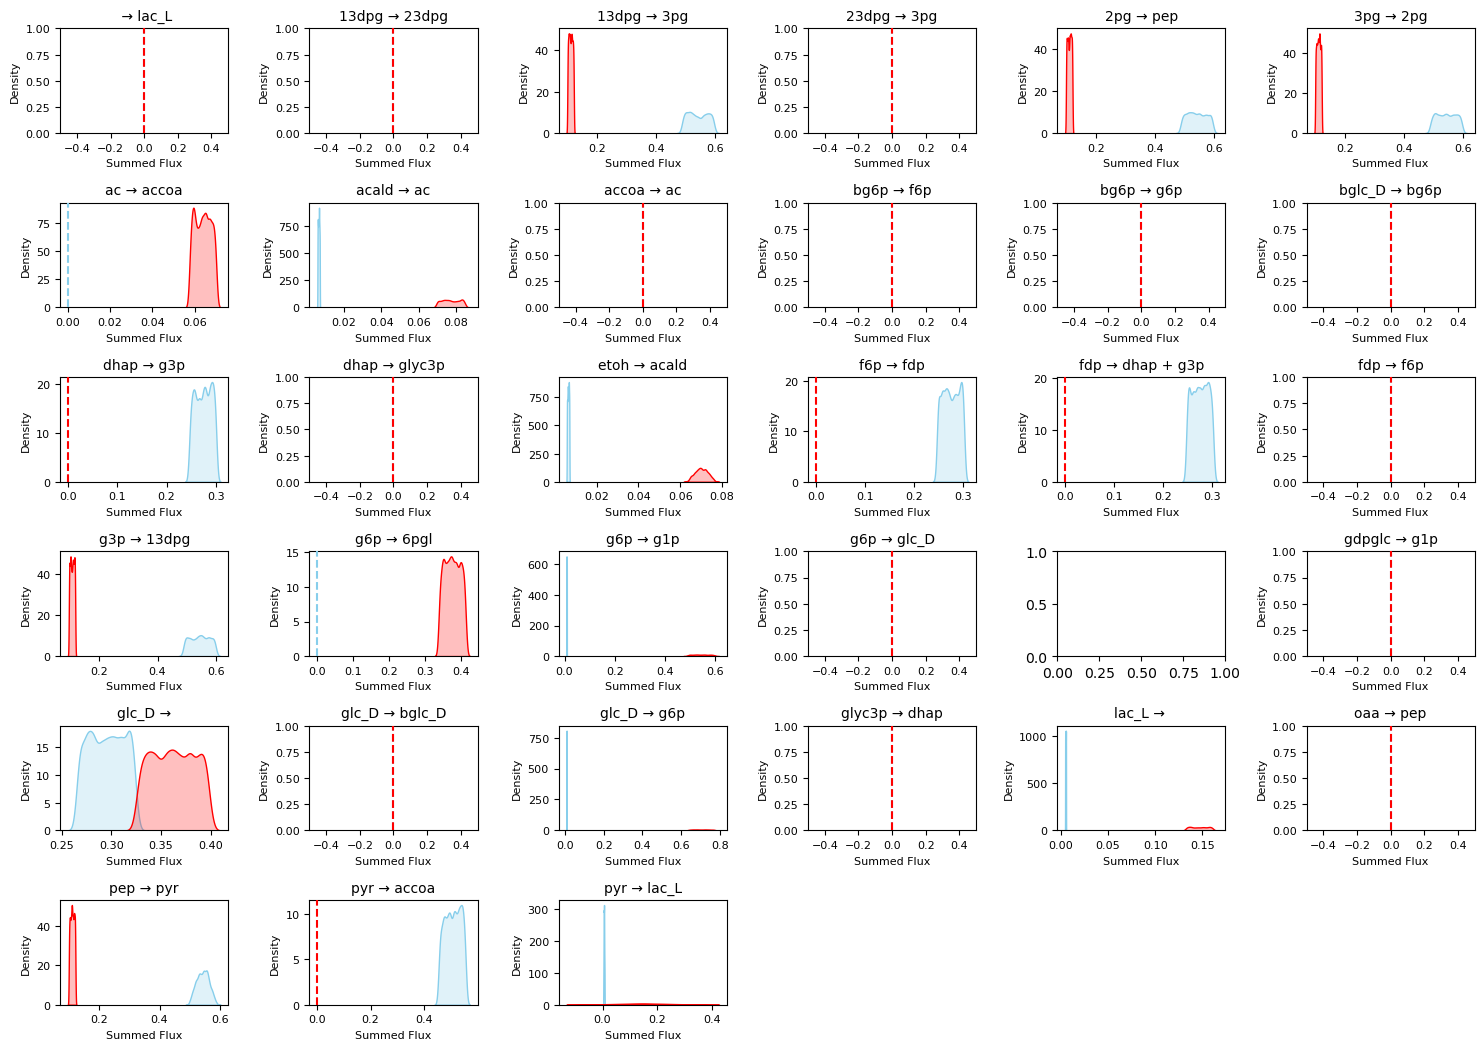

In [16]:
def plot_flux_comparison(df1, df2, title1='Dataset 1', title2='Dataset 2', nrows=7, ncols=6):
    """
    Plots KDEs of summed fluxes side by side for two datasets.

    Parameters:
        df1 (pd.DataFrame): First dataset to compare.
        df2 (pd.DataFrame): Second dataset to compare.
        title1 (str): Label for the first dataset (default is 'Dataset 1').
        title2 (str): Label for the second dataset (default is 'Dataset 2').
        nrows (int): Number of rows in the subplot grid (default is 6).
        ncols (int): Number of columns in the subplot grid (default is 6).
    """
    num_columns = len(df1.columns)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))
    axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

    for i, column in enumerate(df1.columns):
        ax = axes[i]

        if column not in df2.columns:
            print(f"Warning: Column '{column}' not found in {title2}. Skipping.")
            continue

        var_df1 = df1[column].var()
        var_df2 = df2[column].var()
        
        if var_df1 == 0 and var_df2 == 0:
            # Both datasets have constant values for this column
            constant_value_df1 = df1[column].iloc[0]
            constant_value_df2 = df2[column].iloc[0]
            
            ax.set_xlim(constant_value_df1 - 0.5, constant_value_df1 + 0.5)
            ax.axvline(constant_value_df1, color='skyblue', linestyle='--', label=title1, zorder=3)
            ax.axvline(constant_value_df2, color='red', linestyle='--', label=title2, zorder=4)
            ax.set_title(f'Constant values', fontsize=10)
        
        elif var_df1 == 0:
            # df1 has constant value, plot df1 as a vertical line
            constant_value_df1 = df1[column].iloc[0]
            ax.axvline(constant_value_df1, color='skyblue', linestyle='--', label=title1, zorder=3)
            sns.kdeplot(df2[column], ax=ax, color='red', fill=True, label=title2, zorder=2, common_norm=False, warn_singular=False)
        
        elif var_df2 == 0:
            # df2 has constant value, plot df2 as a vertical line
            constant_value_df2 = df2[column].iloc[0]
            ax.axvline(constant_value_df2, color='red', linestyle='--', label=title2, zorder=4)
            sns.kdeplot(df1[column], ax=ax, color='skyblue', fill=True, label=title1, zorder=1, common_norm=False, warn_singular=False)
        
        else:
            # Both datasets have variable values, plot KDE for both
            sns.kdeplot(df1[column], ax=ax, color='skyblue', fill=True, label=title1, zorder=1, common_norm=False, warn_singular=False)
            sns.kdeplot(df2[column], ax=ax, color='red', fill=True, label=title2, zorder=2, common_norm=False, warn_singular=False)
        
        ax.set_title(f'{column}', fontsize=10)
        ax.set_xlabel('Summed Flux', fontsize=8)
        ax.set_ylabel('Density', fontsize=8)
        ax.tick_params(axis='both', labelsize=8)
        
    # Remove any extra subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# plot_flux_comparison(ZeLa_P4_Bio145_summed_flux_df_TCA, WT_P4_Bio143_summed_flux_df_TCA, title1='ZeLa_P4', title2='WT_P4')
plot_flux_comparison(processed_flux_df_ZeLa_gly, processed_flux_df_WT_gly, title1='ZeLa_P6', title2='WT_P6')


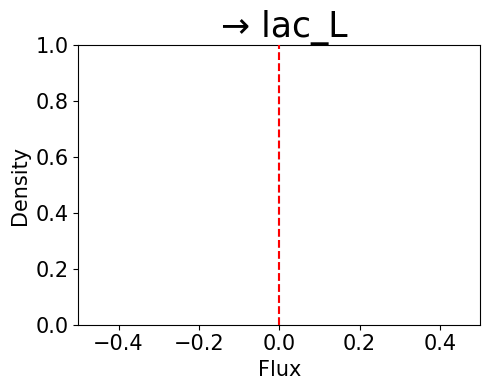

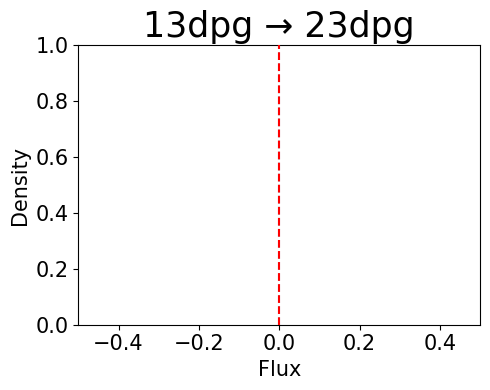

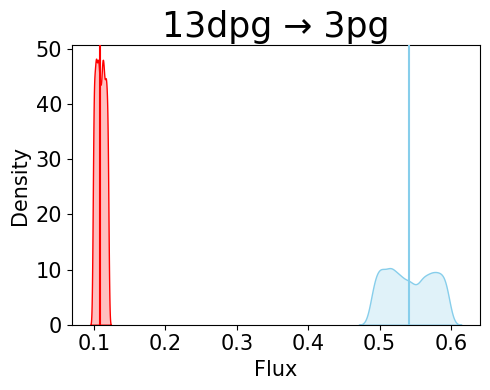

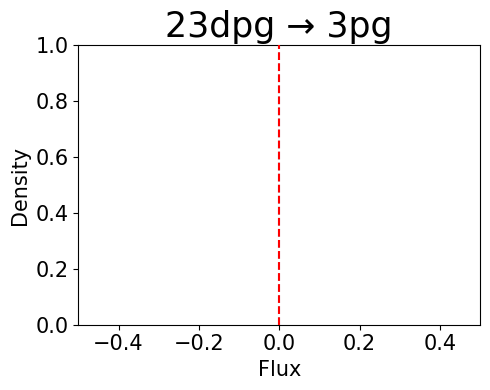

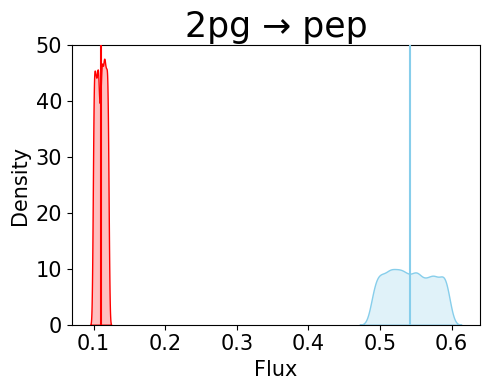

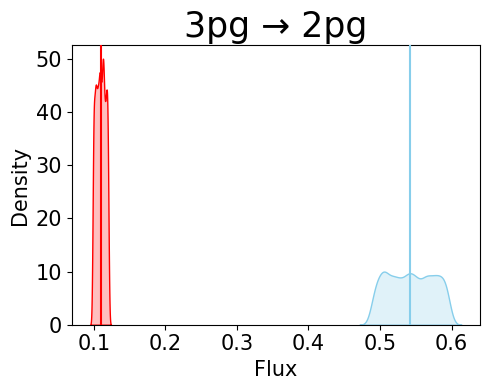

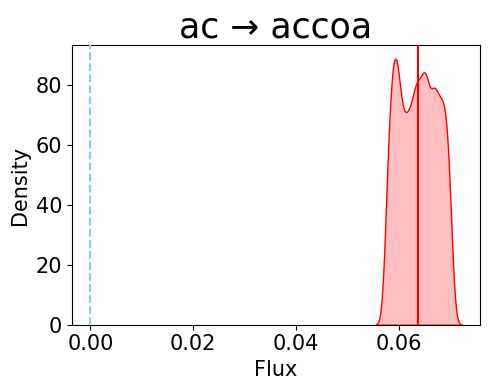

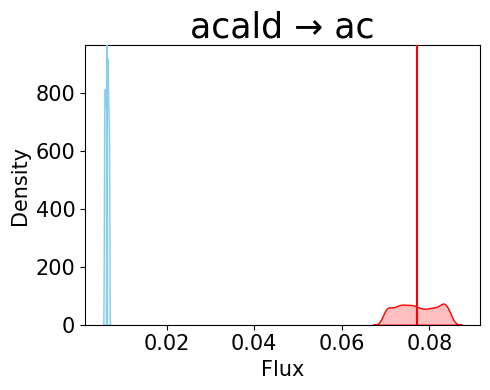

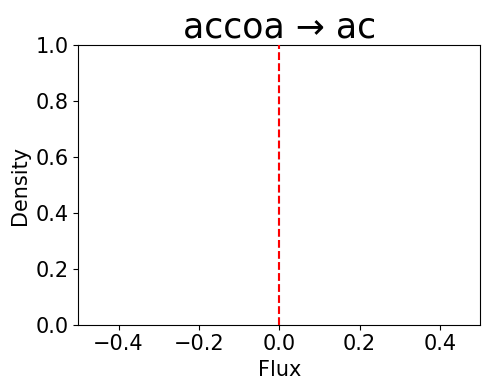

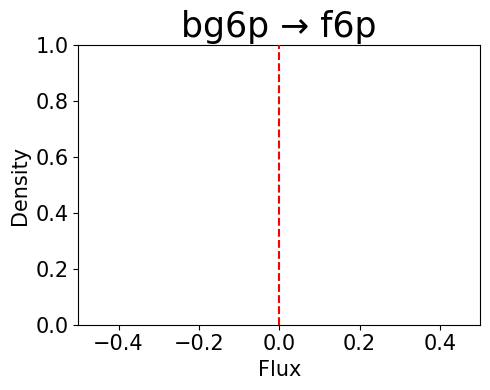

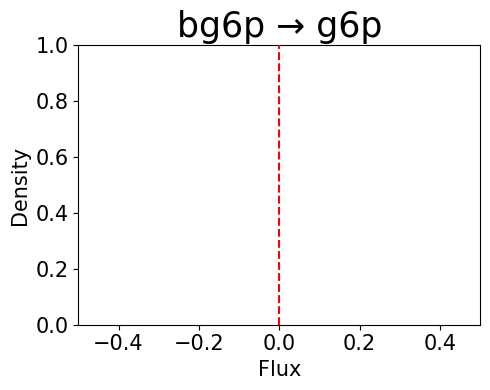

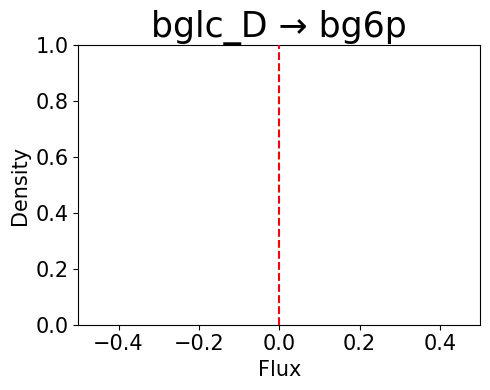

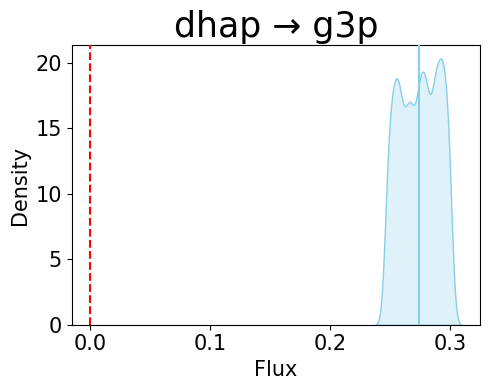

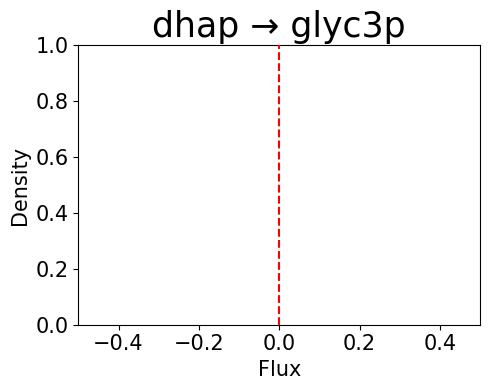

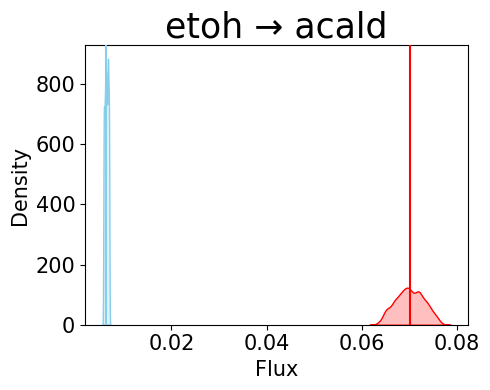

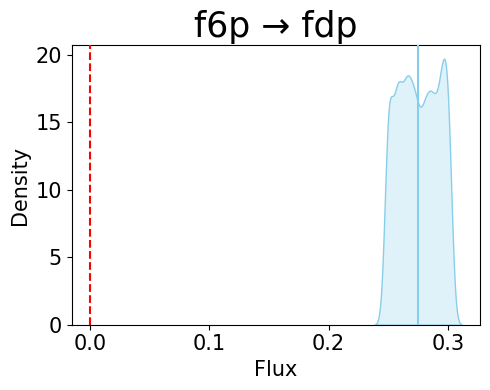

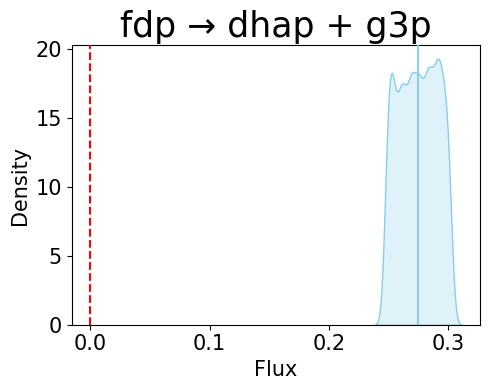

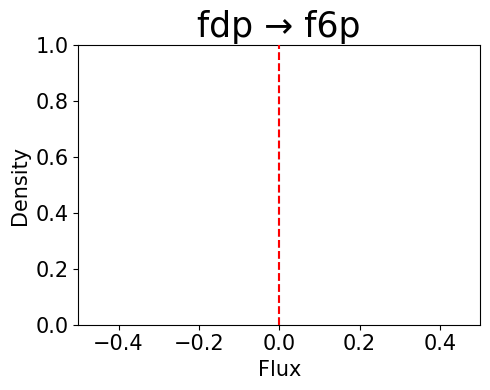

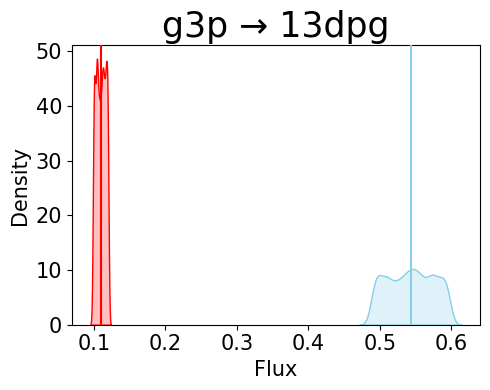

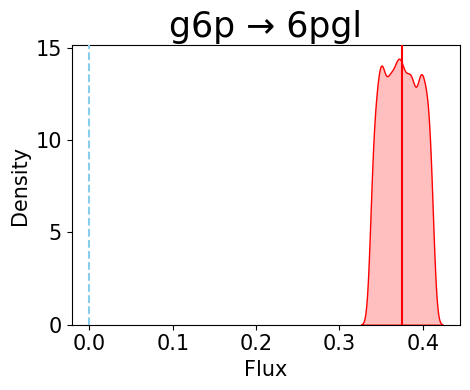

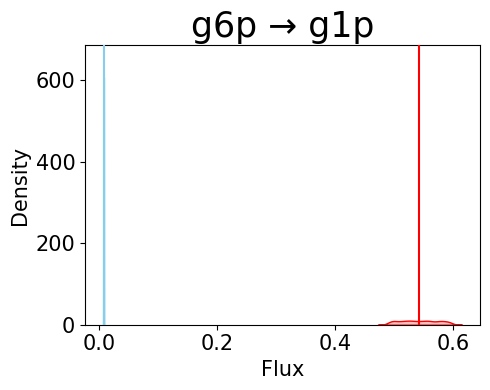

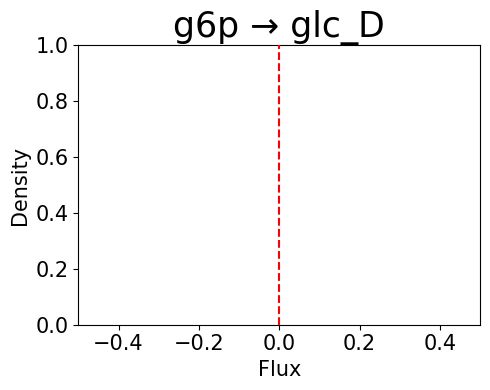

An error occurred while plotting column 'g6p(bg6p) → f6p': 'g6p(bg6p) → f6p'


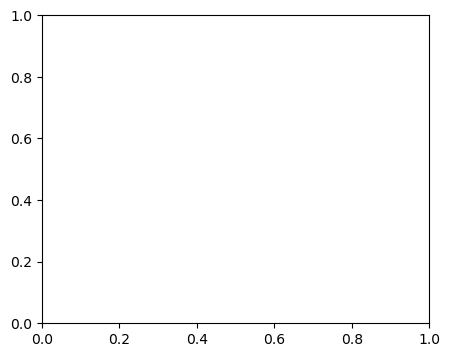

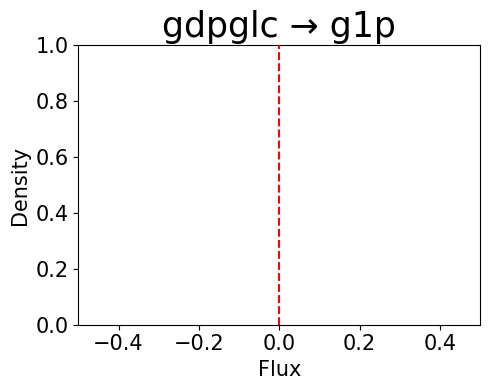

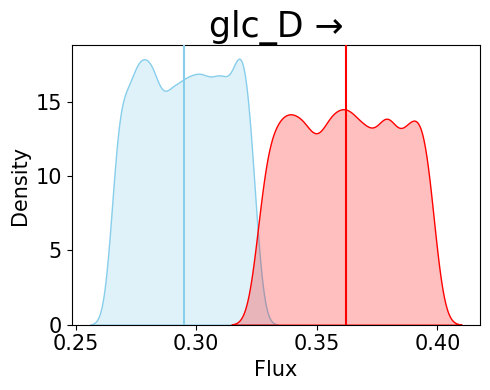

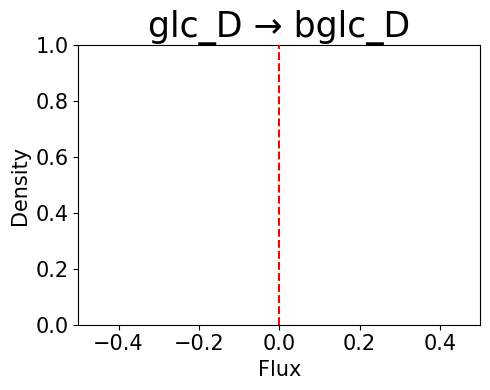

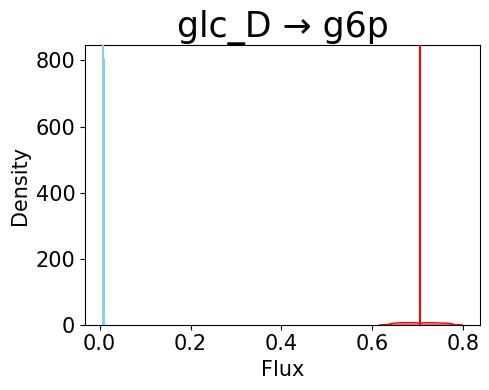

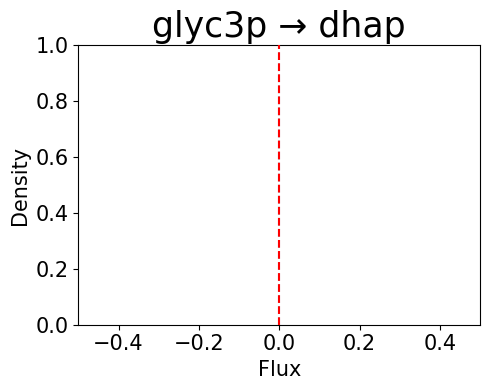

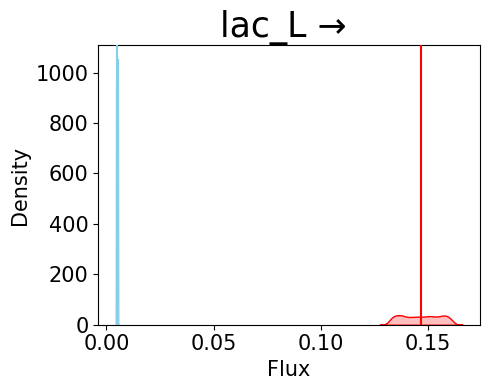

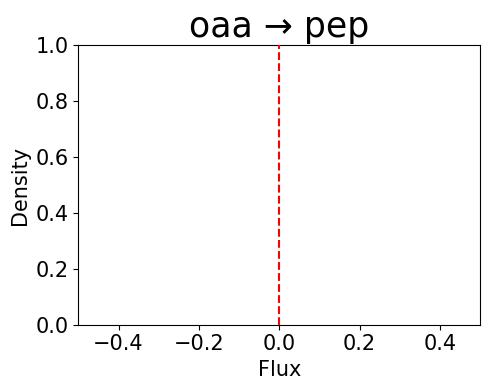

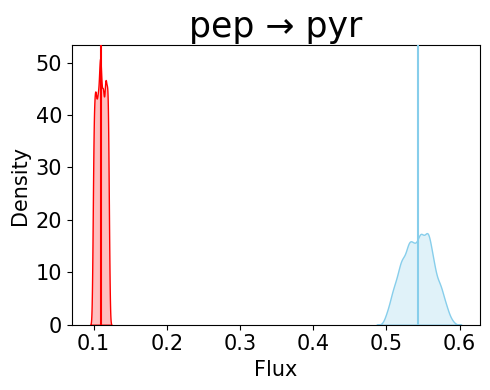

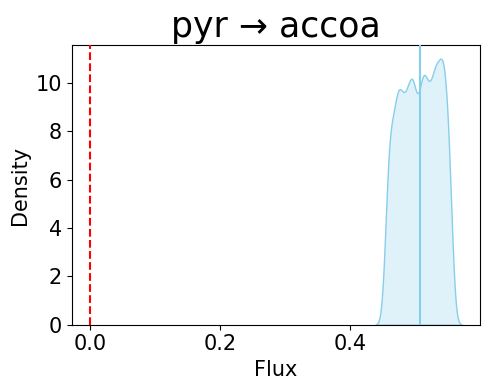

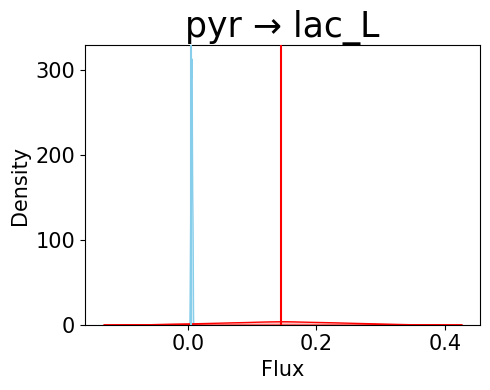

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_flux_comparison(df1, df2, title1='Dataset 1', title2='Dataset 2'):
    """
    Plots KDEs of summed fluxes separately for each column in two datasets.
    
    Parameters:
        df1 (pd.DataFrame): First dataset to compare.
        df2 (pd.DataFrame): Second dataset to compare.
        title1 (str): Label for the first dataset (default is 'Dataset 1').
        title2 (str): Label for the second dataset (default is 'Dataset 2').
    """
    for column in df1.columns:
        try:
            plt.figure(figsize=(5, 4))
            ax = plt.gca()  # Get current axis
            
            var_df1 = df1[column].var()
            var_df2 = df2[column].var()
            
            if var_df1 == 0 and var_df2 == 0:
                # Both datasets have constant values for this column
                constant_value_df1 = df1[column].iloc[0]
                constant_value_df2 = df2[column].iloc[0]
                
                # Set x-axis limits around the constant value to center the dashed line
                ax.set_xlim(constant_value_df1 - 0.5, constant_value_df1 + 0.5)
                ax.axvline(constant_value_df1, color='skyblue', linestyle='--', label=title1, zorder=3)
                ax.axvline(constant_value_df2, color='red', linestyle='--', label=title2, zorder=4)
                ax.set_title('Constant values', fontsize=10)
            
            elif var_df1 == 0:
                # df1 has a constant value, plot it as a vertical line
                constant_value_df1 = df1[column].iloc[0]
                ax.axvline(constant_value_df1, color='skyblue', linestyle='--', label=title1, zorder=3)
                sns.kdeplot(df2[column], ax=ax, color='red', fill=True, label=title2, zorder=2, common_norm=False)
                ax.axvline(df2[column].mean(), color='red', linestyle='-', label=f'{title2} Mean', zorder=5)
            
            elif var_df2 == 0:
                # df2 has a constant value, plot it as a vertical line
                constant_value_df2 = df2[column].iloc[0]
                ax.axvline(constant_value_df2, color='red', linestyle='--', label=title2, zorder=4)
                sns.kdeplot(df1[column], ax=ax, color='skyblue', fill=True, label=title1, zorder=1, common_norm=False)
                ax.axvline(df1[column].mean(), color='skyblue', linestyle='-', label=f'{title1} Mean', zorder=6)
            
            else:
                # Both datasets have variable values, plot KDE for both
                sns.kdeplot(df1[column], ax=ax, color='skyblue', fill=True, label=title1, zorder=1, common_norm=False)
                sns.kdeplot(df2[column], ax=ax, color='red', fill=True, label=title2, zorder=2, common_norm=False)
                
                # Add mean lines for both datasets
                ax.axvline(df1[column].mean(), color='skyblue', linestyle='-', label=f'{title1} Mean', zorder=5)
                ax.axvline(df2[column].mean(), color='red', linestyle='-', label=f'{title2} Mean', zorder=6)
            
            # Set axis titles and labels
            ax.set_title(f'{column}', fontsize=25)
            ax.set_xlabel('Flux', fontsize=15)
            ax.set_ylabel('Density', fontsize=15)
            ax.tick_params(axis='both', labelsize=15)
#             ax.legend(loc='upper right')
            
            plt.tight_layout()
            plt.show()
        
        except Exception as e:
            print(f"An error occurred while plotting column '{column}': {e}")
            continue  # Skip to the next column if an error occurs

# Usage example
plot_flux_comparison(processed_flux_df_ZeLa_gly, processed_flux_df_WT_gly, title1='ZeLa_P6', title2='WT_P6')


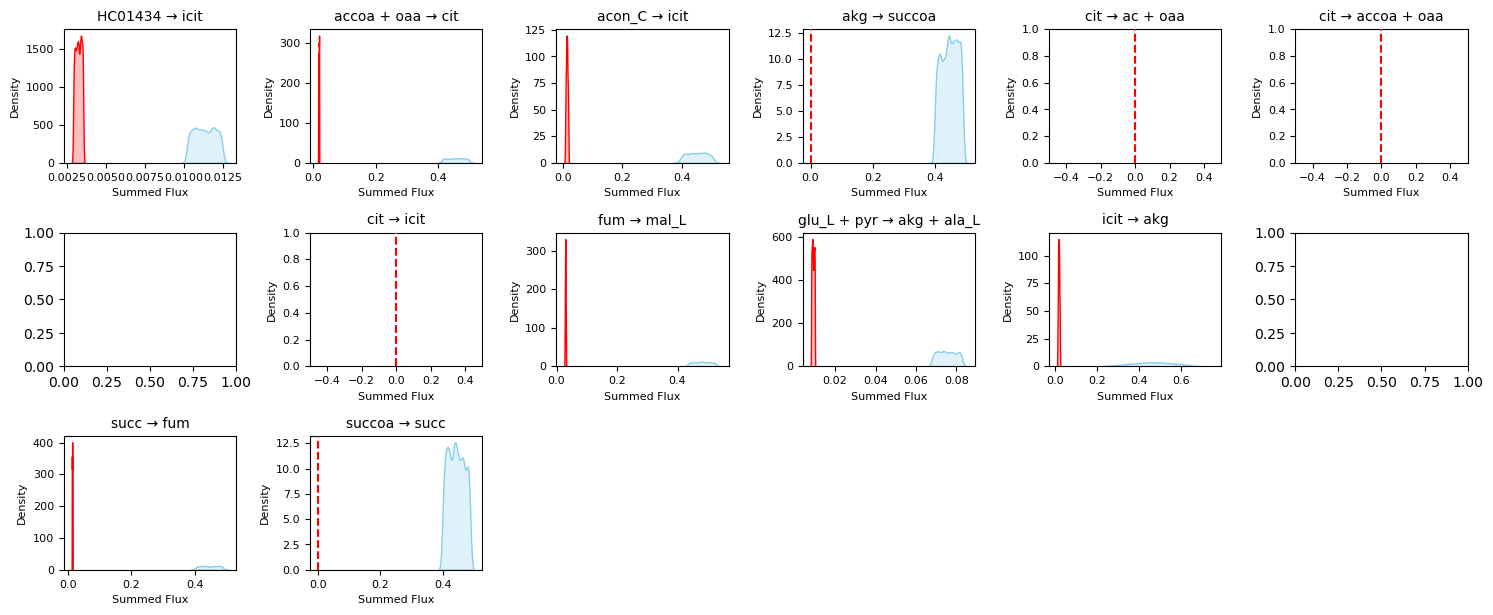

In [18]:
def plot_flux_comparison(df1, df2, title1='Dataset 1', title2='Dataset 2', nrows=6, ncols=6):
    """
    Plots KDEs of summed fluxes side by side for two datasets.

    Parameters:
        df1 (pd.DataFrame): First dataset to compare.
        df2 (pd.DataFrame): Second dataset to compare.
        title1 (str): Label for the first dataset (default is 'Dataset 1').
        title2 (str): Label for the second dataset (default is 'Dataset 2').
        nrows (int): Number of rows in the subplot grid (default is 6).
        ncols (int): Number of columns in the subplot grid (default is 6).
    """
    num_columns = len(df1.columns)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))
    axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

    for i, column in enumerate(df1.columns):
        ax = axes[i]

        if column not in df2.columns:
            print(f"Warning: Column '{column}' not found in {title2}. Skipping.")
            continue

        var_df1 = df1[column].var()
        var_df2 = df2[column].var()
        
        if var_df1 == 0 and var_df2 == 0:
            # Both datasets have constant values for this column
            constant_value_df1 = df1[column].iloc[0]
            constant_value_df2 = df2[column].iloc[0]
            
            ax.set_xlim(constant_value_df1 - 0.5, constant_value_df1 + 0.5)
            ax.axvline(constant_value_df1, color='skyblue', linestyle='--', label=title1, zorder=3)
            ax.axvline(constant_value_df2, color='red', linestyle='--', label=title2, zorder=4)
            ax.set_title(f'Constant values', fontsize=10)
        
        elif var_df1 == 0:
            # df1 has constant value, plot df1 as a vertical line
            constant_value_df1 = df1[column].iloc[0]
            ax.axvline(constant_value_df1, color='skyblue', linestyle='--', label=title1, zorder=3)
            sns.kdeplot(df2[column], ax=ax, color='red', fill=True, label=title2, zorder=2, common_norm=False, warn_singular=False)
        
        elif var_df2 == 0:
            # df2 has constant value, plot df2 as a vertical line
            constant_value_df2 = df2[column].iloc[0]
            ax.axvline(constant_value_df2, color='red', linestyle='--', label=title2, zorder=4)
            sns.kdeplot(df1[column], ax=ax, color='skyblue', fill=True, label=title1, zorder=1, common_norm=False, warn_singular=False)
        
        else:
            # Both datasets have variable values, plot KDE for both
            sns.kdeplot(df1[column], ax=ax, color='skyblue', fill=True, label=title1, zorder=1, common_norm=False, warn_singular=False)
            sns.kdeplot(df2[column], ax=ax, color='red', fill=True, label=title2, zorder=2, common_norm=False, warn_singular=False)
        
        ax.set_title(f'{column}', fontsize=10)
        ax.set_xlabel('Summed Flux', fontsize=8)
        ax.set_ylabel('Density', fontsize=8)
        ax.tick_params(axis='both', labelsize=8)
        
    # Remove any extra subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()


# plot_flux_comparison(ZeLa_P4_Bio145_summed_flux_df_TCA, WT_P4_Bio143_summed_flux_df_TCA, title1='ZeLa_P4', title2='WT_P4')
plot_flux_comparison(processed_flux_df_ZeLa_TCA, processed_flux_df_WT_TCA, title1='ZeLa_P6', title2='WT_P6')


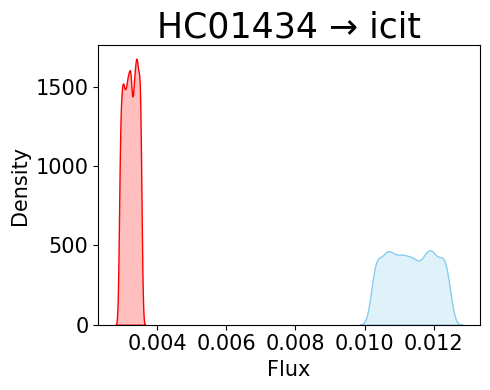

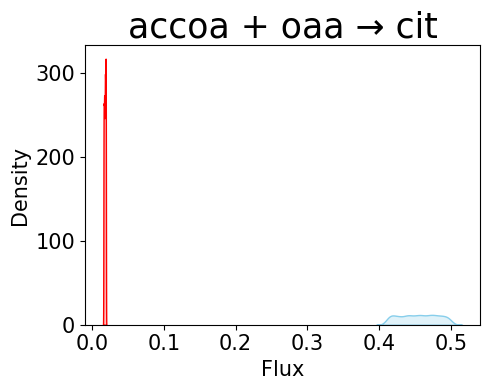

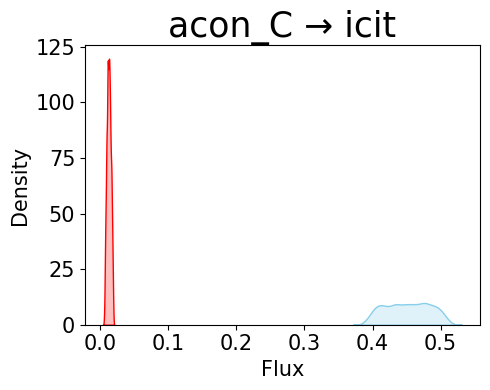

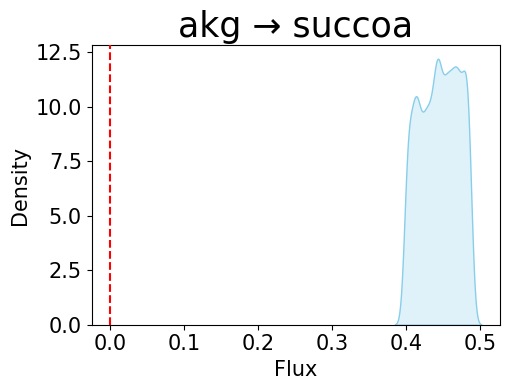

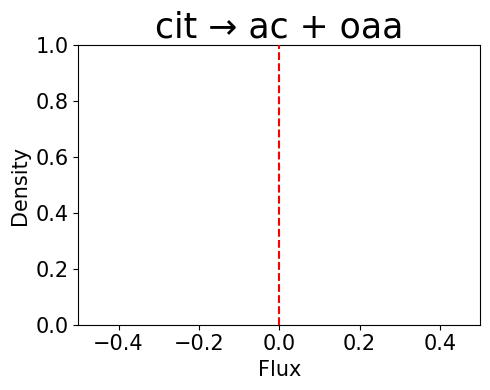

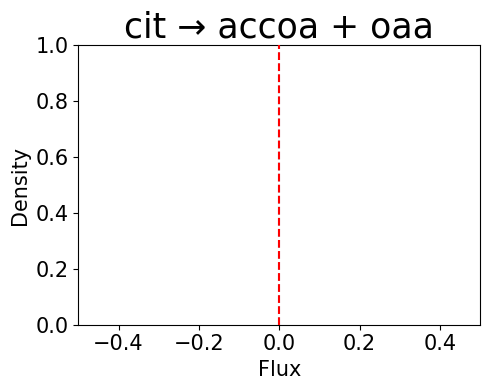

KeyError: 'cit → acon_C'

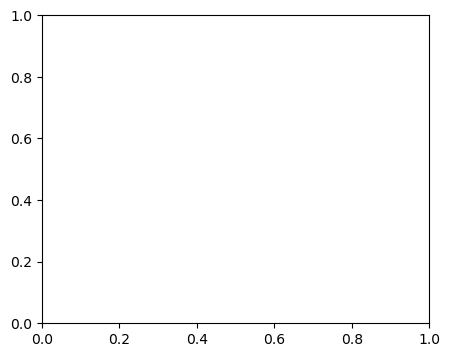

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_flux_comparison(df1, df2, title1='Dataset 1', title2='Dataset 2'):
    """
    Plots KDEs of summed fluxes separately for each column in two datasets.
    
    Parameters:
        df1 (pd.DataFrame): First dataset to compare.
        df2 (pd.DataFrame): Second dataset to compare.
        title1 (str): Label for the first dataset (default is 'Dataset 1').
        title2 (str): Label for the second dataset (default is 'Dataset 2').
    """
    for column in df1.columns:
        plt.figure(figsize=(5, 4))
        ax = plt.gca()  # Get current axis
        
        var_df1 = df1[column].var()
        var_df2 = df2[column].var()
        
        if var_df1 == 0 and var_df2 == 0:
            # Both datasets have constant values for this column
            constant_value_df1 = df1[column].iloc[0]
            constant_value_df2 = df2[column].iloc[0]
            
            # Set x-axis limits around the constant value to center the dashed line
            ax.set_xlim(constant_value_df1 - 0.5, constant_value_df1 + 0.5)
            ax.axvline(constant_value_df1, color='skyblue', linestyle='--', label=title1, zorder=3)
            ax.axvline(constant_value_df2, color='red', linestyle='--', label=title2, zorder=4)
            ax.set_title('Constant values', fontsize=10)
        
        elif var_df1 == 0:
            # df1 has a constant value, plot it as a vertical line
            constant_value_df1 = df1[column].iloc[0]
            ax.axvline(constant_value_df1, color='skyblue', linestyle='--', label=title1, zorder=3)
            sns.kdeplot(df2[column], ax=ax, color='red', fill=True, label=title2, zorder=2, common_norm=False)
        
        elif var_df2 == 0:
            # df2 has a constant value, plot it as a vertical line
            constant_value_df2 = df2[column].iloc[0]
            ax.axvline(constant_value_df2, color='red', linestyle='--', label=title2, zorder=4)
            sns.kdeplot(df1[column], ax=ax, color='skyblue', fill=True, label=title1, zorder=1, common_norm=False)
        
        else:
            # Both datasets have variable values, plot KDE for both
            sns.kdeplot(df1[column], ax=ax, color='skyblue', fill=True, label=title1, zorder=1, common_norm=False)
            sns.kdeplot(df2[column], ax=ax, color='red', fill=True, label=title2, zorder=2, common_norm=False)
        
        # Set axis titles and labels
        ax.set_title(f'{column}', fontsize=25)
        ax.set_xlabel('Flux', fontsize=15)
        ax.set_ylabel('Density', fontsize=15)
        ax.tick_params(axis='both', labelsize=15)
#         ax.legend(loc='upper right')
        
        plt.tight_layout()
        plt.show()

# Usage example
plot_flux_comparison(processed_flux_df_ZeLa_TCA, processed_flux_df_WT_TCA, title1='ZeLa_P6', title2='WT_P6')


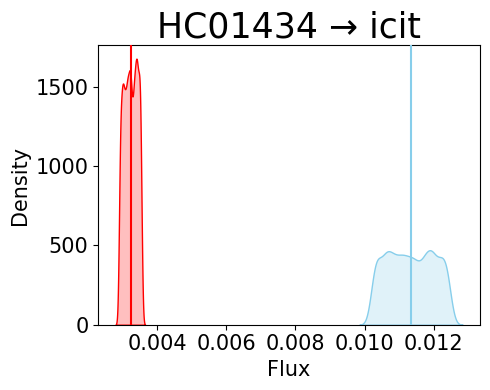

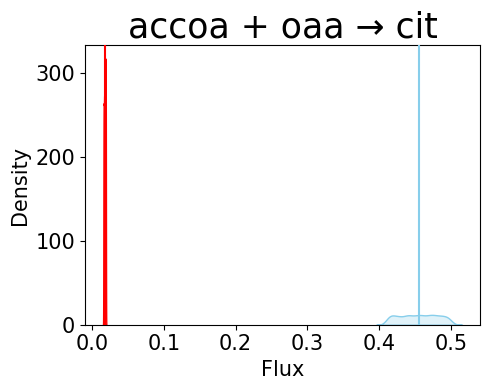

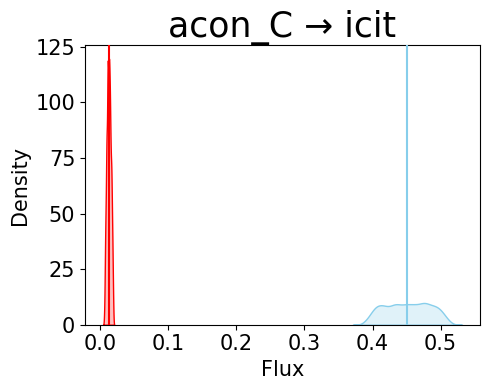

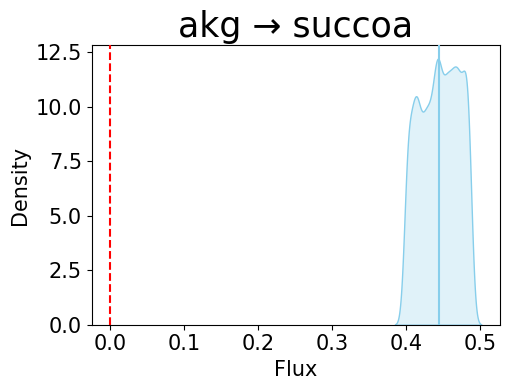

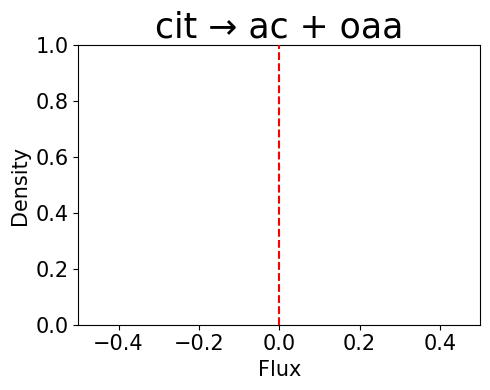

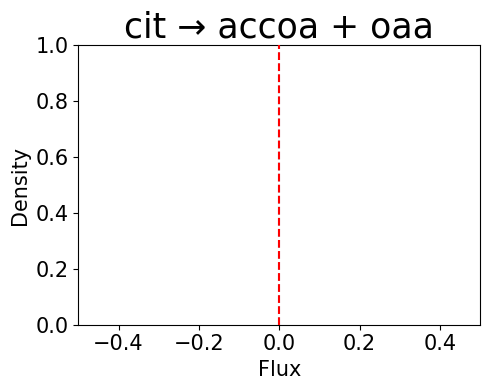

An error occurred while plotting column 'cit → acon_C': 'cit → acon_C'


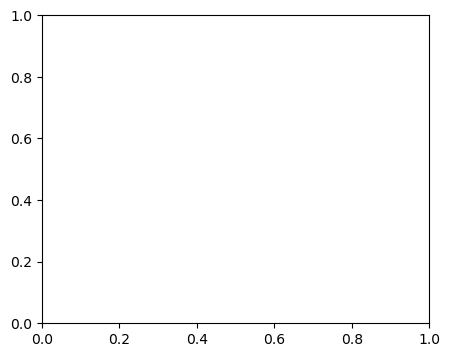

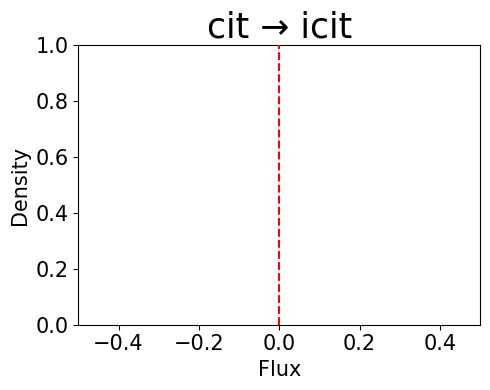

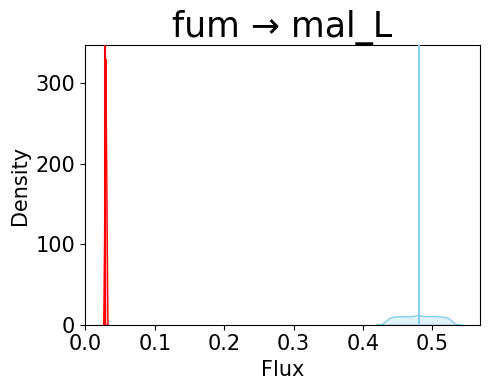

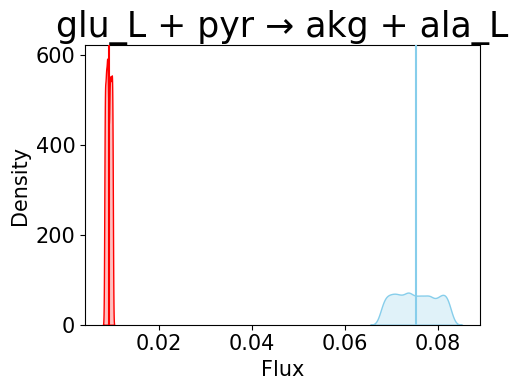

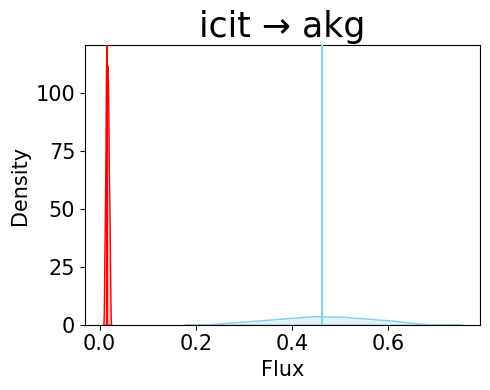

An error occurred while plotting column 'mal_L → oaa': 'mal_L → oaa'


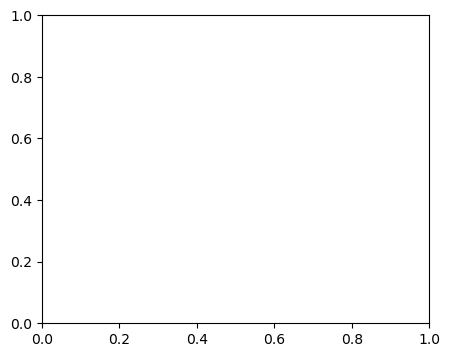

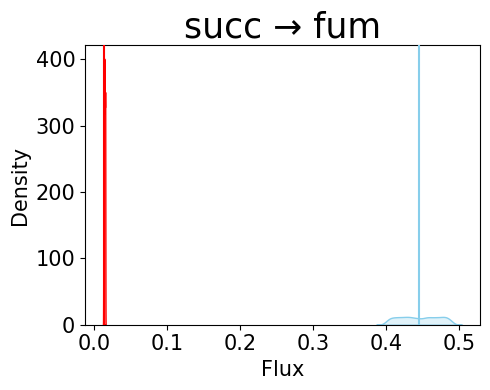

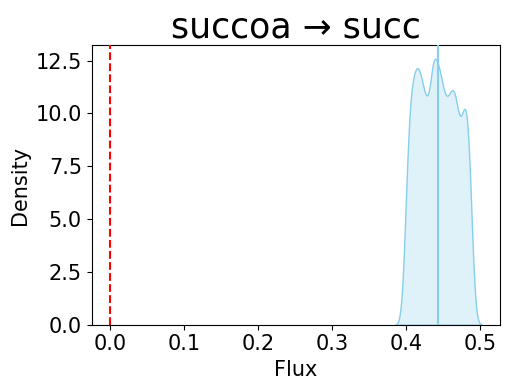

In [37]:
def plot_flux_comparison(df1, df2, title1='Dataset 1', title2='Dataset 2'):
    """
    Plots KDEs of summed fluxes separately for each column in two datasets,
    with mean values shown as solid vertical lines.
    
    Parameters:
        df1 (pd.DataFrame): First dataset to compare.
        df2 (pd.DataFrame): Second dataset to compare.
        title1 (str): Label for the first dataset (default is 'Dataset 1').
        title2 (str): Label for the second dataset (default is 'Dataset 2').
    """
    for column in df1.columns:
        try:
            plt.figure(figsize=(5, 4))
            ax = plt.gca()  # Get current axis
            
            var_df1 = df1[column].var()
            var_df2 = df2[column].var()
            
            if var_df1 == 0 and var_df2 == 0:
                # Both datasets have constant values for this column
                constant_value_df1 = df1[column].iloc[0]
                constant_value_df2 = df2[column].iloc[0]
                
                # Set x-axis limits around the constant value to center the dashed line
                ax.set_xlim(constant_value_df1 - 0.5, constant_value_df1 + 0.5)
                ax.axvline(constant_value_df1, color='skyblue', linestyle='--', label=title1, zorder=3)
                ax.axvline(constant_value_df2, color='red', linestyle='--', label=title2, zorder=4)
                ax.set_title('Constant values', fontsize=10)
            
            elif var_df1 == 0:
                # df1 has a constant value, plot it as a vertical line
                constant_value_df1 = df1[column].iloc[0]
                ax.axvline(constant_value_df1, color='skyblue', linestyle='--', label=title1, zorder=3)
                sns.kdeplot(df2[column], ax=ax, color='red', fill=True, label=title2, zorder=2, common_norm=False)
                ax.axvline(df2[column].mean(), color='red', linestyle='-', label=f'{title2} Mean', zorder=5)
            
            elif var_df2 == 0:
                # df2 has a constant value, plot it as a vertical line
                constant_value_df2 = df2[column].iloc[0]
                ax.axvline(constant_value_df2, color='red', linestyle='--', label=title2, zorder=4)
                sns.kdeplot(df1[column], ax=ax, color='skyblue', fill=True, label=title1, zorder=1, common_norm=False)
                ax.axvline(df1[column].mean(), color='skyblue', linestyle='-', label=f'{title1} Mean', zorder=6)
            
            else:
                # Both datasets have variable values, plot KDE for both
                sns.kdeplot(df1[column], ax=ax, color='skyblue', fill=True, label=title1, zorder=1, common_norm=False)
                sns.kdeplot(df2[column], ax=ax, color='red', fill=True, label=title2, zorder=2, common_norm=False)
                
                # Add mean lines for both datasets
                ax.axvline(df1[column].mean(), color='skyblue', linestyle='-', label=f'{title1} Mean', zorder=5)
                ax.axvline(df2[column].mean(), color='red', linestyle='-', label=f'{title2} Mean', zorder=6)
            
            # Set axis titles and labels
            ax.set_title(f'{column}', fontsize=25)
            ax.set_xlabel('Flux', fontsize=15)
            ax.set_ylabel('Density', fontsize=15)
            ax.tick_params(axis='both', labelsize=15)
#             ax.legend(loc='upper right')
            
            plt.tight_layout()
            plt.show()
        
        except Exception as e:
            print(f"An error occurred while plotting column '{column}': {e}")
            continue  # Skip to the next column if an error occurs
            
            
# Usage example
plot_flux_comparison(processed_flux_df_ZeLa_TCA, processed_flux_df_WT_TCA, title1='ZeLa_P6', title2='WT_P6')


In [ ]:
for rxn in model.reactions:
    # Get the reactant and product IDs without compartments from the model reaction
    rxn_reactants = [met.id[:-2] if len(met.id) > 2 else met.id for met in rxn.reactants]
    rxn_products = [met.id[:-2] if len(met.id) > 2 else met.id for met in rxn.products]
    print(rxn_reactants, "/n" , rxn_products)

In [ ]:
# Function to filter reactions to dictionary with modified target reactants and products
def filter_reactions_to_dict(model, reaction_list):
    reaction_dict = {}

    for rxn in model.reactions:
        # Get the reactant and product IDs without compartments from the model reaction
        rxn_reactants = [met.id[:-2] if len(met.id) > 2 else met.id for met in rxn.reactants]
        rxn_products = [met.id[:-2] if len(met.id) > 2 else met.id for met in rxn.products]

        for reaction_data in reaction_list:
            # Remove last two characters from reaction_list targets
            target_reactants = [reactant[:-2] if len(reactant) > 2 else reactant for reactant in reaction_data["reactants"]]
            target_products = [product[:-2] if len(product) > 2 else product for product in reaction_data["products"]]

            # Check for matches (direct and reverse)
            reactants_match = set(target_reactants).issubset(rxn_reactants)
            products_match = set(target_products).issubset(rxn_products)
            reverse_reactants_match = set(target_reactants).issubset(rxn_products)
            reverse_products_match = set(target_products).issubset(rxn_reactants)

            if reactants_match and products_match:
                key = f"{' + '.join(target_reactants)} → {' + '.join(target_products)}"
            elif reverse_reactants_match and reverse_products_match:
                key = f"{' + '.join(target_products)} → {' + '.join(target_reactants)}"
            else:
                continue

            # Add to dictionary if key does not exist
            if key not in reaction_dict:
                reaction_dict[key] = []
            if rxn.id not in reaction_dict[key]:
                reaction_dict[key].append(rxn.id)

    return reaction_dict

# Usage
filtered_reaction_dict_TCA = filter_reactions_to_dict(iCHO3K, reaction_list_TCA)
filtered_reaction_dict_gly = filter_reactions_to_dict(iCHO3K, reaction_list_gly)


In [ ]:
# Function to filter reactions to dictionary with modified target reactants and products
def filter_reactions_to_dict(model, reaction_list):
    reaction_dict = {}

    for rxn in model.reactions:
        # Get the reactant and product IDs without compartments from the model reaction
        rxn_reactants = [met.id[:-2] if len(met.id) > 2 else met.id for met in rxn.reactants]
        rxn_products = [met.id[:-2] if len(met.id) > 2 else met.id for met in rxn.products]

        for reaction_data in reaction_list:
            # Remove last two characters from reaction_list targets
            target_reactants = [reactant[:-2] if len(reactant) > 2 else reactant for reactant in reaction_data["reactants"]]
            target_products = [product[:-2] if len(product) > 2 else product for product in reaction_data["products"]]

            # Check for matches (direct and reverse)
            reactants_match = set(target_reactants).issubset(rxn_reactants)
            products_match = set(target_products).issubset(rxn_products)
            reverse_reactants_match = set(target_reactants).issubset(rxn_products)
            reverse_products_match = set(target_products).issubset(rxn_reactants)

            # Forward reaction
            if reactants_match and products_match:
                key = f"{' + '.join(target_reactants)} → {' + '.join(target_products)}"
                if key not in reaction_dict:
                    reaction_dict[key] = []
                if rxn.id not in reaction_dict[key]:
                    reaction_dict[key].append(rxn.id)

            # Reverse reaction
            elif reverse_reactants_match and reverse_products_match:
                reverse_key = f"{' + '.join(target_products)} → {' + '.join(target_reactants)}"
                if reverse_key not in reaction_dict:
                    reaction_dict[reverse_key] = []
                if rxn.id not in reaction_dict[reverse_key]:
                    reaction_dict[reverse_key].append(rxn.id)

    return reaction_dict

# Usage
filtered_reaction_dict_TCA = filter_reactions_to_dict(iCHO3K, reaction_list_TCA)
filtered_reaction_dict_gly = filter_reactions_to_dict(iCHO3K, reaction_list_gly)